In [56]:
import matplotlib.pyplot as plt
from aim import Run
import os
from src.utils.ProjectConfiguration import ProjectConfiguration as pc
from aim.storage.context import Context
import pandas as pd
import seaborn as sns
import json, numpy as np

In [127]:
def get_image(path, sample, gt=False):
    config = json.load(open(os.path.join(path, "config.json"), "r"))
    run_hash = config["experiment.run_hash"]
    exp_name = config["experiment.name"]
    run = Run(run_hash=run_hash, 
                    experiment=exp_name, repo=os.path.join(pc.FILER_BASE_PATH, pc.STUDY_PATH, 'Aim'),
                    read_only=True)
    idx, imgs = run.get_image_sequence(f"test/img/{sample}.nii.gz", Context({})).data.items_list()
    arr = np.array(imgs[0][-1].to_pil_image())
    img = arr[:,:320]
    if gt:
        seg = arr[:, 2*320:3*320]
    else:
        seg = arr[:, 320:2*320]

    alpha = np.zeros((img.shape[0], img.shape[1], 4))
    alpha[:,:,0] = (seg[:,:,0] != 0).astype(np.uint8) * 255
    alpha[:,:,1] = 0
    alpha[:,:,2] = 0
    alpha[:,:,3] = (seg[:,:,0] != 0).astype(np.uint8) * 125
    return img, alpha.astype(np.uint8)

In [ ]:
models = [
    ("<path>/Experiments/prostate_m3d_M3dSegmentation/", "M3D-NCA"),
    ("<path>/Experiments/prostatefAbl_none_10_1.0_16_OctreeNCASegmentation/", "OctreeNCA"),
    ("<path>/Experiments/prostate_unet_UNetSegmentation/", "UNet"),
    ("<path>/Experiments/prostate_munet3d_UNet_resnet18_0_minUNet3DSegmentation/", "Resnet18"),
    ("<path>/Experiments/prostate_munet3d_UNet_densenet121_0_minUNet3DSegmentation/", "Densenet"),
    ("<path>/Experiments/prostate_munet3d_UNet_densenet121_0_minUNet3DSegmentation/", "gt"),
]
test_cases = ["prostate_06", "prostate_13", "prostate_28", "prostate_32", "prostate_34", "prostate_41", "prostate_47"]

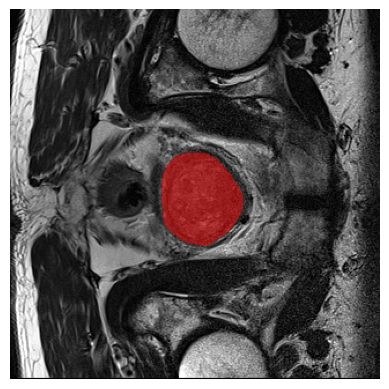

In [131]:
for path, name in models:
    for case in test_cases:
        if name == "gt":
            img, alpha = get_image(path, case, gt=True)
        else:
            img, alpha = get_image(path, case, gt=False)
        plt.clf()
        plt.imshow(img)
        plt.imshow(alpha)
        plt.axis('off')
        plt.savefig(f"figures/qualitative/prostate/{name}_{case}_pred.pdf", bbox_inches='tight', pad_inches=0)

(np.float64(-0.5), np.float64(319.5), np.float64(319.5), np.float64(-0.5))

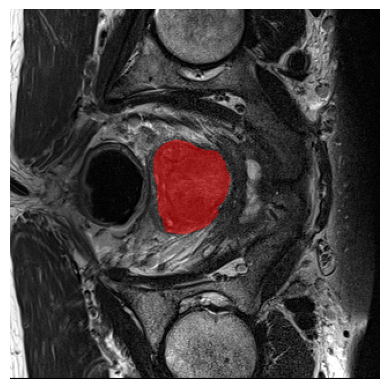

In [124]:
img, alpha = get_image(path, test_cases[0], gt=False)   

plt.imshow(img)
plt.imshow(alpha)
plt.axis('off')